<h1 style="text-align:center;margin:50px 0">Neural Networks</h1>
<h2 style="text-align:center;margin:30px 0;color:blue">MLP (Multi Layer Perceptron)</h2>

## 1. A simple example on a custom dataset

> We will use the [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) function in __scikit-learn__.  
> It generates a feature matrix X and target array y.
> 
#### We will give it these parameters:
* __n_samples__: number of datapoints
* __n_features__: number of features
* __n_informative__: number of informative features
* __n_redundant__: number of redundant features
* __random_state__: random state to guarantee same result every time

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [97]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [99]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50), alpha=0.0001, solver='adam', random_state=3)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=3)

In [100]:
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


## 2. Predicting Handwritten Digits

<p style="color:blue">We will be working with the <abbr title="Modified National Institute of Standards and Technology"><b>MNIST</b></abbr> database of handwritten digits.</p>

### a) Understanding dataset

In [101]:
from sklearn.datasets import load_digits

In [102]:
X, y = load_digits(n_class=2, return_X_y=True)

In [103]:
print(X.shape, y.shape)

(360, 64) (360,)


In [104]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [105]:
print(y[0])

0


In [106]:
print(X[0].reshape(8, 8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


### b) Drawing the digits

In [107]:
import matplotlib.pyplot as plt

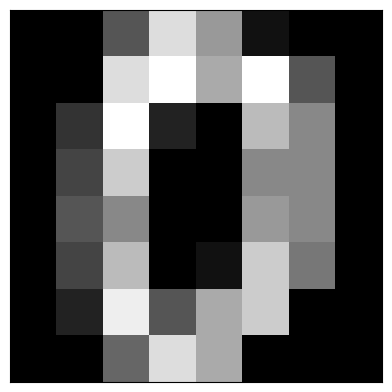

In [110]:
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

### c) MLP for MNIST Dataset

In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [38]:
X, y = load_digits(return_X_y=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [40]:
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=2)

In [41]:
print(mlp.score(X_test, y_test))

0.96


#### Testing our model

In [42]:
y_pred = mlp.predict(X_test)
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test]

##### Let’s look at the first image that we got wrong and what our prediction was.

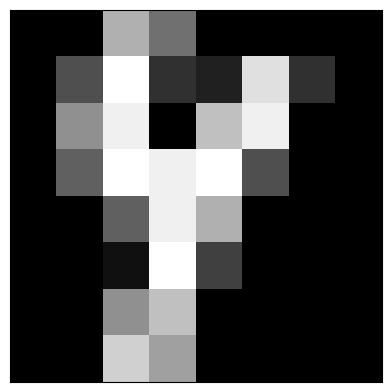

True value: 4
Predicted value: 9


In [47]:
j = 0
plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print("True value:", incorrect_true[j])
print("Predicted value:", incorrect_pred[j])

## 3. Visualizing MLP Weights

> We will use a more granular version of the MNIST dataset.  
> Instead of using the version in __scikit-learn__ which has 64 pixel images, we will use a version from [Open ML](www.openml.org) that has 784 pixels (28 x 28).  
> We can use [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml) for directly downloading datasets from the Open ML database.

In [112]:
import numpy as np
from sklearn.datasets import fetch_openml

In [113]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### a) Understanding dataset

In [114]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [115]:
print(np.min(X), np.max(X))

0 255


In [116]:
print(y[0:5])

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


### b) Choosing a subset of dataset (because of the large number of data)

##### For our example, we will be using only the digits 0-3, so we can use the following code to segment out that portion of the dataset.

In [117]:
X = X.astype(int)
y = y.astype(int)

X5 = X[y <= 3]
y5 = y[y <= 3]

### c) Training the model

In [118]:
mlp=MLPClassifier(hidden_layer_sizes=(6,), max_iter=200, alpha=1e-4, solver='sgd', random_state=2)
mlp.fit(X5, y5)

MLPClassifier(hidden_layer_sizes=(6,), random_state=2, solver='sgd')

### d) Understanding weights

In [119]:
print(len(mlp.coefs_))

2


In [120]:
print(mlp.coefs_[0].shape)

(784, 6)


In [121]:
print(mlp.coefs_[1].shape)

(6, 4)


### e) Visualizing weights

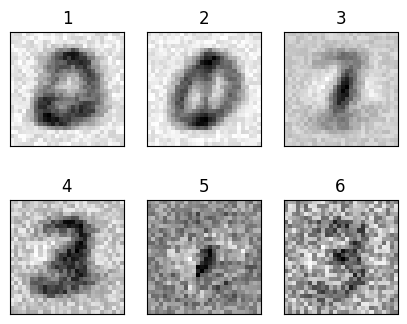

In [122]:
fig, axes = plt.subplots(2, 3, figsize=(5, 4))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()

> You can see that nodes 4 and 6 are determining if the digit is a 3.  
> Node 1 is determining if the digit is a 0 or a 2 since you can see both of those values in the image.  
> Not every hidden node will have an obvious use.